## digit_recognizer 手写数字识别

手写数字识别作为机器学习的入门项目，非常手动各种模型，算法的青睐，新的算法，模型也首选该数据集作为用于测试。 
同时作为kaggle的入门题目，本篇博客打算使用kaggle提供的数据集，借助tensorflow， 使用基础API,高层API分别实现ANN， CNN， RNN， 
来进行数据训练和预测。

更基础的titanic项目：https://github.com/yunshuipiao/sw-kaggle/blob/master/titanic/01.ipynb

In [117]:
# 常用包的导入
import numpy as np
import pandas as pd
import sklearn
import sklearn.preprocessing
import sklearn.model_selection
import  matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import tensorflow as tf
# import warnings

In [118]:
# 加载数据
train_df = pd.read_csv('./datasets/train.csv')
test_df = pd.read_csv('./datasets/test.csv')
sample_df = pd.read_csv('./datasets/sample_submission.csv')

In [119]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [120]:
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [121]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


通过对数据简单的分析，可以知道：  
label是需要预测的结果，为0-9, pixel0-pixel783共计28*28个像素， 为输入特征， 范围在0-255之间，后续需要标准化数据.

## 数据可视化

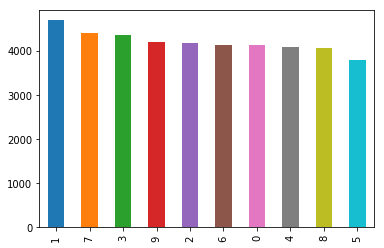

In [122]:
train_df['label'].value_counts().plot.bar()  #每个数字的预测分布

In [123]:
# 定义函数查看图片
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image)

9


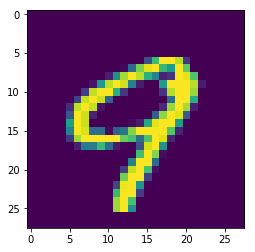

In [124]:
images = train_df.drop('label', axis=1).values
plot_digit(images[100])
print(train_df.iloc[100]['label'])

In [125]:
X_train = train_df[[i for i in train_df.columns if i not in ['label']]]
y_train = train_df['label']
X_test = test_df

## 数据处理

In [126]:
# 标准化数据， 查看前后对比结果
X_train = sklearn.preprocessing.scale(X_train)
X_test = sklearn.preprocessing.scale(X_test)

In [127]:
# PCA降维，查看前后对比结果

In [128]:
y_train_one_hot = pd.get_dummies(y_train, prefix='label')

In [129]:
y_train = y_train.values
y_train_one_hot = y_train_one_hot.values

In [130]:
# 切分数据为训练集和验证集
X_train, X_verify, y_train, y_verify, y_train_one_hot, y_verify_one_hot = sklearn.model_selection.train_test_split(X_train, 
                                                                                                                   y_train,
                                                                                                                   y_train_one_hot, 
                                                                                                                   stratify=y_train, 
                                                                                                                   test_size=0.1
                                                                                                                  )

In [131]:
type(y_train_one_hot)

numpy.ndarray

## 最基本的ANN

In [132]:
# 基本参数
learning_rate = 0.01
num_steps = 500
batch_size = 100
display_step = 100

In [170]:
# 神经网络参数
n_hidden_1 =500
n_hidden_2 = 100
num_input = 28 * 28
num_class = 10

In [171]:
# tf的输出
X = tf.placeholder(tf.float32, [None, num_input])
Y = tf.placeholder(tf.float32, [None, num_class])

In [172]:
# 保存每一册的权重
weights = {
    'h1':tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2, num_class]))
}
biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([num_class])),
}

In [173]:
# 创建神经网络模型
def neural_net(x):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [174]:
# 结果输出
logits = neural_net(X)

# 定义损失和优化器:交叉熵
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)  #根据学习率去最小化loss
train_op = optimizer.minimize(loss_op)  #训练操作

currect_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
 #上一条语句判断结果是否相等，结果为true or false。求均值即为预测的正确率
accuracy = tf.reduce_mean(tf.cast(currect_pred, tf.float32)) 

In [175]:
init = tf.global_variables_initializer()  #初始化所有的变量

In [176]:
# 开始训练
with tf.Session() as sess:
    sess.run(init) 
    for  step in range(num_steps):
        random_index = np.random.randint(0, X_train.shape[0] - batch_size)
        X_batch = X_train[random_index:random_index + batch_size]
        y_batch = y_train_one_hot[random_index:random_index + batch_size]
    
        sess.run(train_op, feed_dict={X:X_batch, Y:y_batch})
        
        if step % display_step == 0:
            # 计算损失和精确度
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X:X_batch, Y:y_batch})
            print("Step: ", step, 'Minibatch:', "{:.4f}".format(loss), 'Trainging Accuracy:', 
                  '{:.3}'.format(acc))
    print("Optimization Finished")
    acc_verify = sess.run(accuracy, feed_dict={X:X_verify, Y:y_verify_one_hot})
    print("Testing Accuracy: ", acc_verify)

Step:  0 Minibatch: 2814.4600 Trainging Accuracy: 0.39
Step:  100 Minibatch: 626.3727 Trainging Accuracy: 0.86
Step:  200 Minibatch: 784.3148 Trainging Accuracy: 0.86
Step:  300 Minibatch: 154.9960 Trainging Accuracy: 0.89
Step:  400 Minibatch: 422.3517 Trainging Accuracy: 0.86
Optimization Finished
Testing Accuracy:  0.8704762


In [ ]:
使用包含两个隐藏层的神经网络(500 ,100), 目前得到的结果精确度为87%。 接下来使用高级API， 同样的网络结构， 对比结果。

## 高级API实现ANN

In [200]:
# 定义输入数据
input_fn = tf.estimator.inputs.numpy_input_fn(x = X_train, y = y_train, batch_size=batch_size, 
                                             shuffle=True)

In [201]:
# 定义网络结构和输出
def neural_net(x):
    # 包含300个隐藏神经元的全连接层
    layer_1 = tf.layers.dense(x, n_hidden_1)
    # 包含100个隐藏神经元的全连接层
    layer_2 = tf.layers.dense(layer_1, n_hidden_2)
    out_layer = tf.layers.dense(layer_2, num_class)
    return out_layer

In [202]:
# 按照tf estimator 模板 定义模型函数
def model_fn(features, labels, mode):  # 函数格式要固定
    # 构建网络
    logits = neural_net(features)
    
    # 进行预测
    pred_classes = tf.argmax(logits, 1)
    pred_probas = tf.nn.softmax(logits)
    
    # 如果是预测过程，则返回
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes)
    
    # 定义损失和优化器
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, 
                                                                           labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    # 评估模型
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
    # estimator 需要返回一个 EstimatorSpec, 用于指定不同的操作过程，比如训练，评估等等。
    estim_specs = tf.estimator.EstimatorSpec(mode=mode, 
                                            predictions=pred_classes,
                                            loss=loss_op,
                                            train_op=train_op, 
                                            eval_metric_ops={'accuracy': acc_op})
    return estim_specs

In [203]:
model = tf.estimator.Estimator(model_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/j0/mlln6qvj2kl42rr7mg80lsxc0000gn/T/tmpfimtqrz_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a5b0d4048>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [204]:
model.train(input_fn, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/j0/mlln6qvj2kl42rr7mg80lsxc0000gn/T/tmpfimtqrz_/model.ckpt.
INFO:tensorflow:loss = 3.730599735436741, step = 1
INFO:tensorflow:global_step/sec: 129.179
INFO:tensorflow:loss = 1.151235917554626, step = 101 (0.775 sec)
INFO:tensorflow:global_step/sec: 137.423
INFO:tensorflow:loss = 0.7802723853991033, step = 201 (0.728 sec)
INFO:tensorflow:global_step/sec: 148.105
INFO:tensorflow:loss = 1.2215217740946884, step = 301 (0.675 sec)
INFO:tensorflow:Saving checkpoints for 378 into /var/folders/j0/mlln6qvj2kl42rr7mg80lsxc0000gn/T/tmpfimtqrz_/model.ckpt.
INFO:tensorflow:Loss for final step: 1.3676940644242912.


In [206]:
# 评估模型
input_fn = tf.estimator.inputs.numpy_input_fn(x=X_verify, y=y_verify, batch_size=batch_size, 
                                             shuffle=False)
model.evaluate(input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-07-02:29:24
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/j0/mlln6qvj2kl42rr7mg80lsxc0000gn/T/tmpfimtqrz_/model.ckpt-378
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-07-02:29:24
INFO:tensorflow:Saving dict for global step 378: accuracy = 0.8428571, global_step = 378, loss = 0.9102599


{'accuracy': 0.8428571, 'global_step': 378, 'loss': 0.9102599}

In [208]:
# 执行预测
n_images = 4
test_images = X_test[100:100 + n_images]
input_fn = tf.estimator.inputs.numpy_input_fn(x=test_images,
                                             shuffle=False)
preds = list(model.predict(input_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/j0/mlln6qvj2kl42rr7mg80lsxc0000gn/T/tmpfimtqrz_/model.ckpt-378
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [209]:
preds

[0, 3, 2, 0]

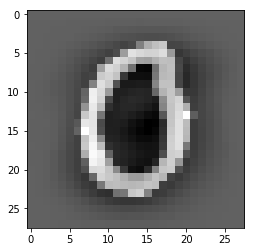

Model prediction: 0


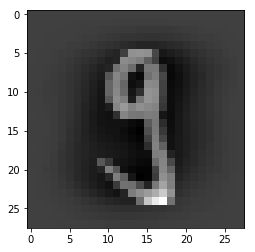

Model prediction: 3


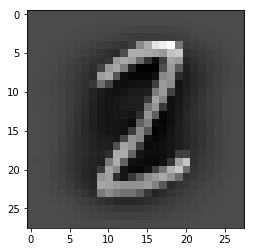

Model prediction: 2


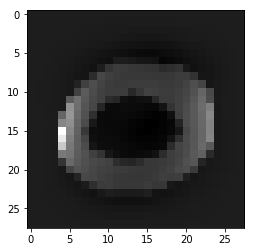

Model prediction: 0


In [210]:
# Display
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction:", preds[i])